In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from OutilsP3 import *

from mpl_toolkits.mplot3d import Axes3D

# SciKit Learn
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from mlxtend.plotting import plot_pca_correlation_graph

# Stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
appData = pd.read_csv("appData.csv")

# <font color='red'>I - Analyse uni-variée</font>

Text(0, 0.5, 'Graisses pour 100g')

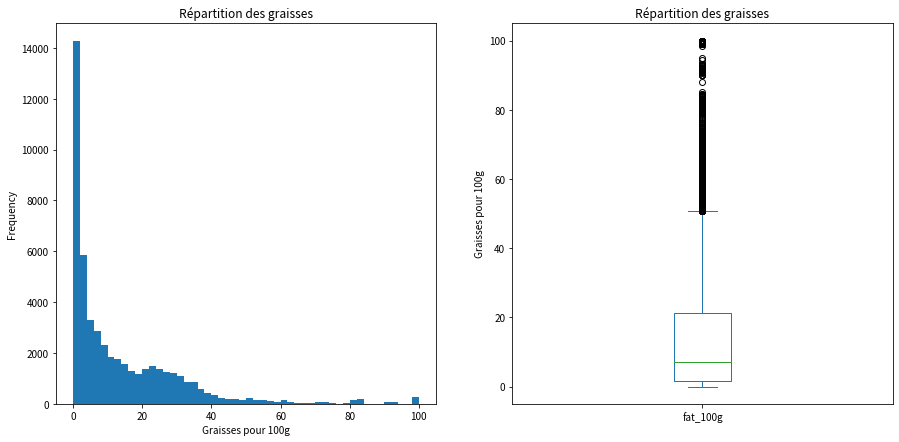

In [3]:
plt.subplot(1,2,1)
appData["fat_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition des graisses")
plt.xlabel("Graisses pour 100g")

plt.subplot(1,2,2)
appData["fat_100g"].plot.box()
plt.title("Répartition des graisses")
plt.ylabel("Graisses pour 100g")

In [4]:
appData["fat_100g"].describe()

count    49805.000000
mean        13.492456
std         16.874064
min          0.000000
25%          1.500000
50%          7.000000
75%         21.200000
max        100.000000
Name: fat_100g, dtype: float64

Text(0, 0.5, 'Graisses saturées pour 100g')

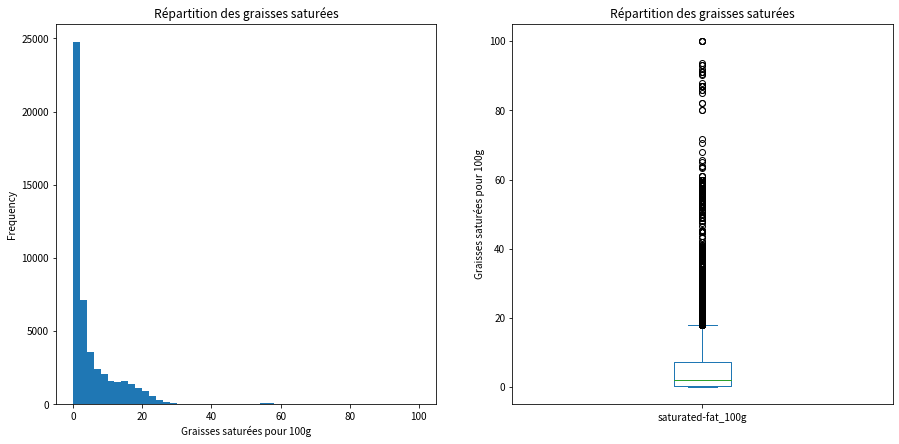

In [5]:
plt.subplot(1,2,1)
appData["saturated-fat_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition des graisses saturées")
plt.xlabel("Graisses saturées pour 100g")

plt.subplot(1,2,2)
appData["saturated-fat_100g"].plot.box()
plt.title("Répartition des graisses saturées")
plt.ylabel("Graisses saturées pour 100g")

In [6]:
appData["saturated-fat_100g"].describe()

count    49805.000000
mean         5.302934
std          8.023359
min          0.000000
25%          0.300000
50%          2.000000
75%          7.400000
max        100.000000
Name: saturated-fat_100g, dtype: float64

Text(0, 0.5, 'Glucides pour 100g')

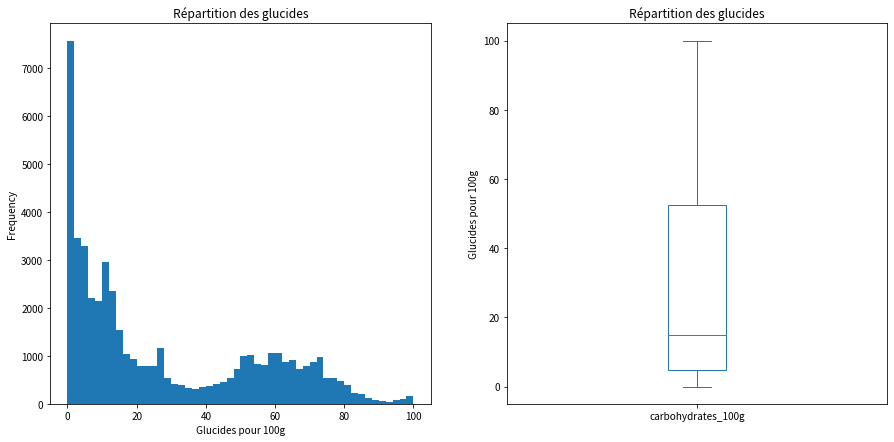

In [7]:
plt.subplot(1,2,1)
appData["carbohydrates_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition des glucides")
plt.xlabel("Glucides pour 100g")

plt.subplot(1,2,2)
appData["carbohydrates_100g"].plot.box()
plt.title("Répartition des glucides")
plt.ylabel("Glucides pour 100g")

In [8]:
appData["carbohydrates_100g"].describe()

count    49805.000000
mean        27.620037
std         26.758464
min          0.000000
25%          4.800000
50%         15.000000
75%         52.500000
max        100.000000
Name: carbohydrates_100g, dtype: float64

Text(0, 0.5, 'Sucres pour 100g')

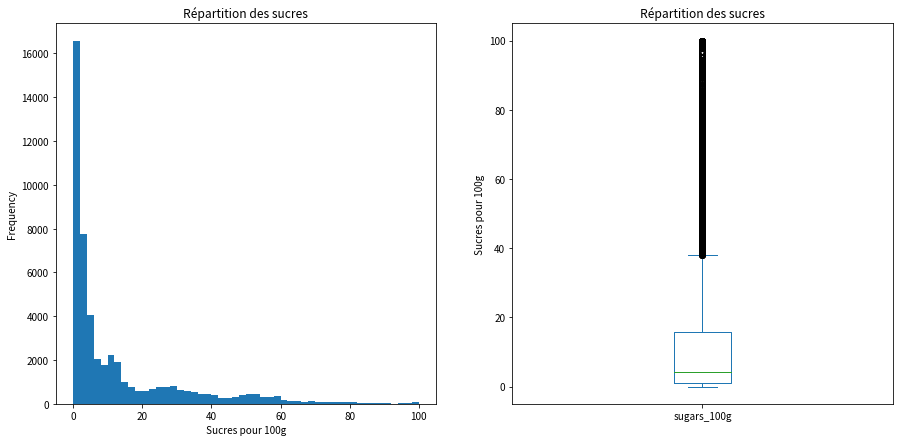

In [9]:
plt.subplot(1,2,1)
appData["sugars_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition des sucres")
plt.xlabel("Sucres pour 100g")

plt.subplot(1,2,2)
appData["sugars_100g"].plot.box()
plt.title("Répartition des sucres")
plt.ylabel("Sucres pour 100g")

Text(0, 0.5, 'Fibres pour 100g')

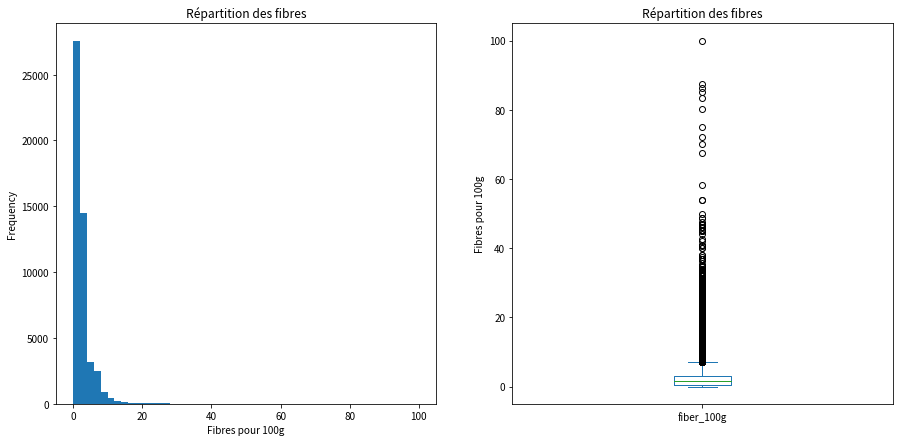

In [10]:
plt.subplot(1,2,1)
appData["fiber_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition des fibres")
plt.xlabel("Fibres pour 100g")

plt.subplot(1,2,2)
appData["fiber_100g"].plot.box()
plt.title("Répartition des fibres")
plt.ylabel("Fibres pour 100g")

In [11]:
appData["fiber_100g"].describe()

count    49805.000000
mean         2.402450
std          3.337136
min          0.000000
25%          0.427583
50%          1.700000
75%          3.077977
max        100.000000
Name: fiber_100g, dtype: float64

Text(0, 0.5, 'Proteines pour 100g')

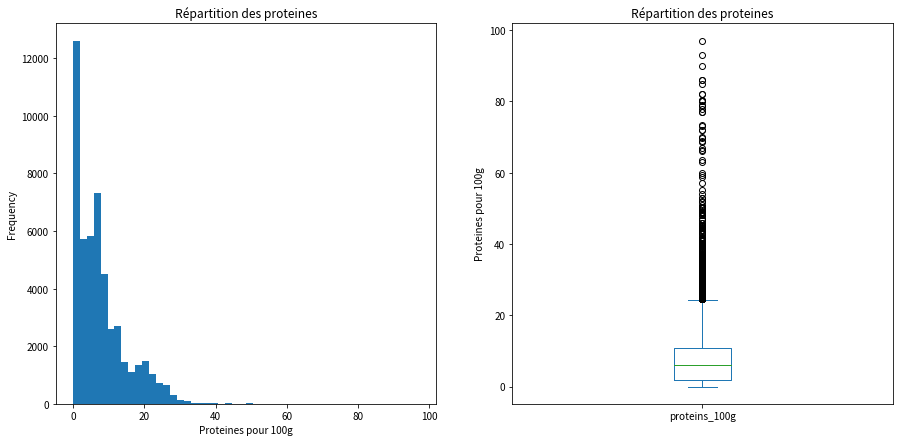

In [12]:
plt.subplot(1,2,1)
appData["proteins_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition des proteines")
plt.xlabel("Proteines pour 100g")

plt.subplot(1,2,2)
appData["proteins_100g"].plot.box()
plt.title("Répartition des proteines")
plt.ylabel("Proteines pour 100g")

In [13]:
appData["proteins_100g"].describe()

count    49805.000000
mean         7.652101
std          7.403813
min          0.000000
25%          1.900000
50%          6.000000
75%         10.900000
max         97.060000
Name: proteins_100g, dtype: float64

Text(0, 0.5, 'Sel pour 100g')

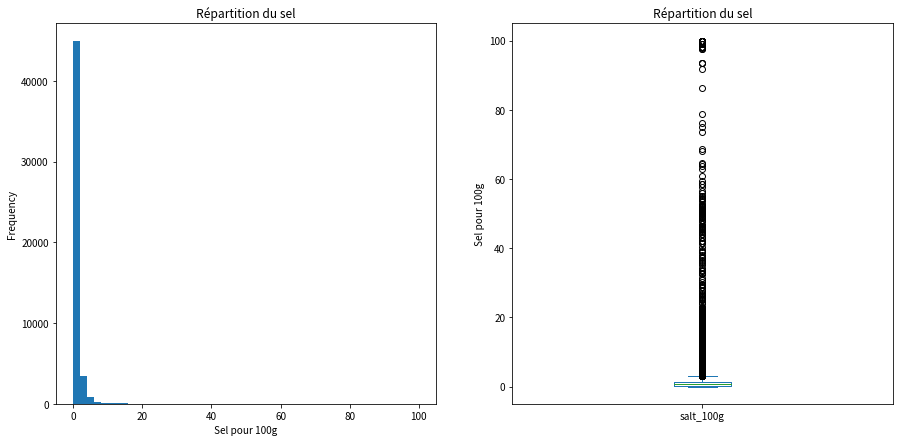

In [14]:
plt.subplot(1,2,1)
appData["salt_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition du sel")
plt.xlabel("Sel pour 100g")

plt.subplot(1,2,2)
appData["salt_100g"].plot.box()
plt.title("Répartition du sel")
plt.ylabel("Sel pour 100g")

In [15]:
appData["salt_100g"].describe()

count    49805.000000
mean         1.083697
std          3.780799
min          0.000000
25%          0.080000
50%          0.600000
75%          1.260000
max        100.000000
Name: salt_100g, dtype: float64

Text(0, 0.5, 'Energie pour 100g')

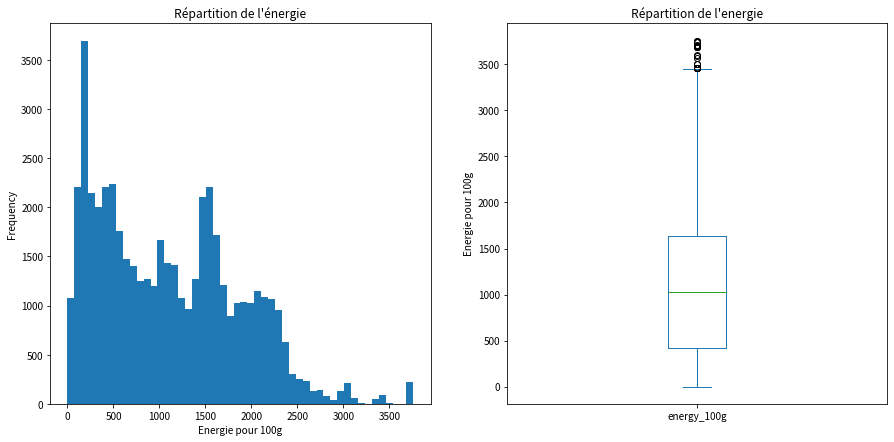

In [16]:
plt.subplot(1,2,1)
appData["energy_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition de l'énergie")
plt.xlabel("Energie pour 100g")

plt.subplot(1,2,2)
appData["energy_100g"].plot.box()
plt.title("Répartition de l'energie")
plt.ylabel("Energie pour 100g")

In [17]:
appData["energy_100g"].describe()

count    49805.000000
mean      1100.175286
std        761.595108
min          0.000000
25%        421.000000
50%       1025.000000
75%       1636.000000
max       3760.000000
Name: energy_100g, dtype: float64

Text(0, 0.5, 'Nutri-score pour 100g')

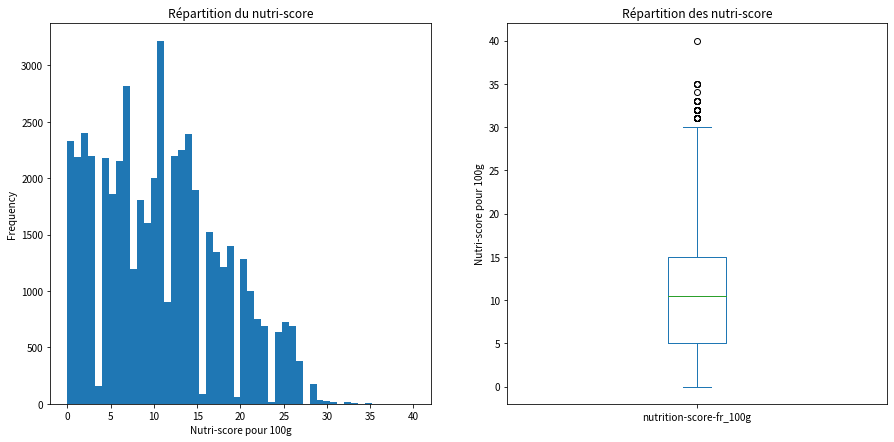

In [18]:
plt.subplot(1,2,1)
appData["nutrition-score-fr_100g"].plot.hist(bins = 50,figsize = (15,7))
plt.title("Répartition du nutri-score")
plt.xlabel("Nutri-score pour 100g")

plt.subplot(1,2,2)
appData["nutrition-score-fr_100g"].plot.box()
plt.title("Répartition des nutri-score")
plt.ylabel("Nutri-score pour 100g")

In [19]:
appData["nutrition-score-fr_100g"].describe()

count    49805.000000
mean        10.707754
std          7.004876
min          0.000000
25%          5.000000
50%         10.420000
75%         15.000000
max         40.000000
Name: nutrition-score-fr_100g, dtype: float64

Text(0, 0.5, "Nombre d'article")

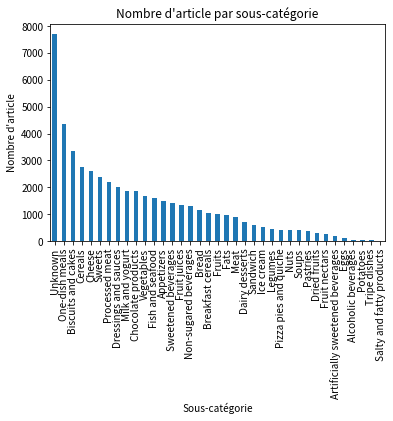

In [20]:
appData["pnns_groups_2"].value_counts().plot.bar()
plt.title("Nombre d'article par sous-catégorie")
plt.xlabel("Sous-catégorie")
plt.ylabel("Nombre d'article")

# <font color='red'>II - Analyse multi-variée</font>

Text(0.5, 1.0, 'Taux de sucre en fonction du taux de glucides')

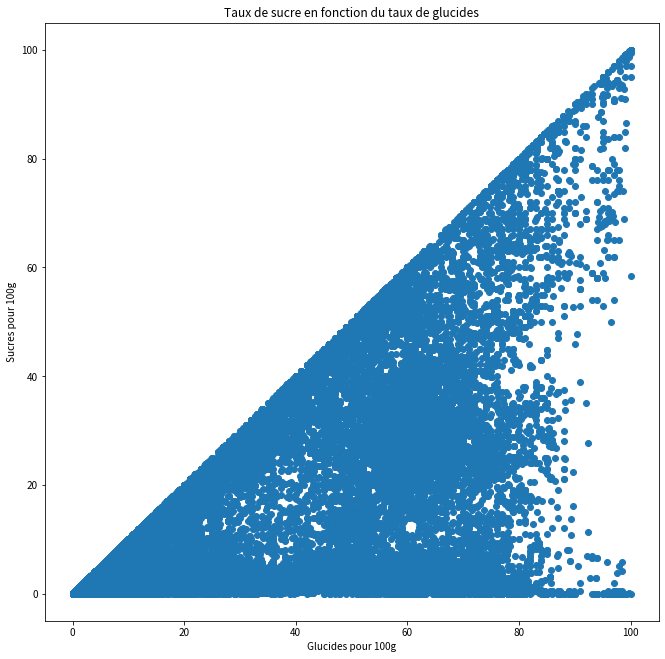

In [21]:
plt.figure(figsize=(11,11))
plt.scatter(appData["carbohydrates_100g"], appData["sugars_100g"])
plt.xlabel("Glucides pour 100g")
plt.ylabel("Sucres pour 100g")
plt.title("Taux de sucre en fonction du taux de glucides")

Text(0.5, 1.0, 'Taux de graisses saturées en fonction du taux de graisses')

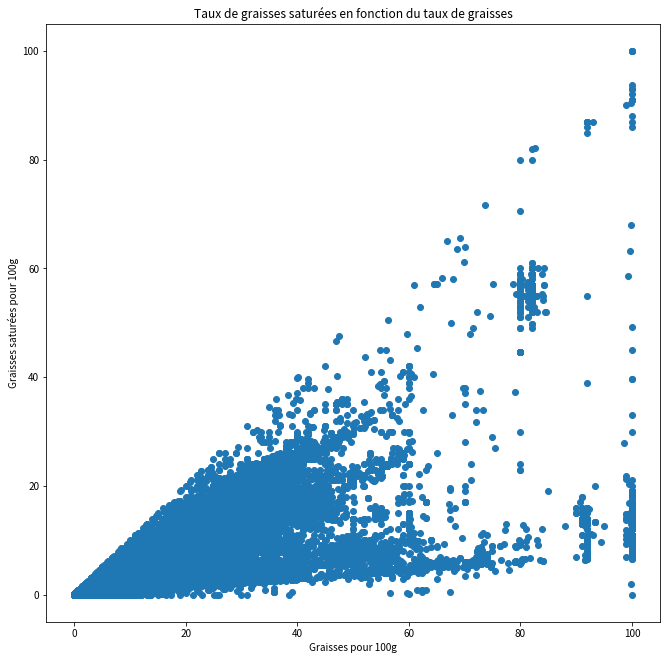

In [22]:
plt.figure(figsize=(11,11))
plt.scatter(appData["fat_100g"], appData["saturated-fat_100g"])
plt.xlabel("Graisses pour 100g")
plt.ylabel("Graisses saturées pour 100g")
plt.title("Taux de graisses saturées en fonction du taux de graisses")

Text(0.5, 1.0, 'Taux de graisses saturées en fonction du nutri-score')

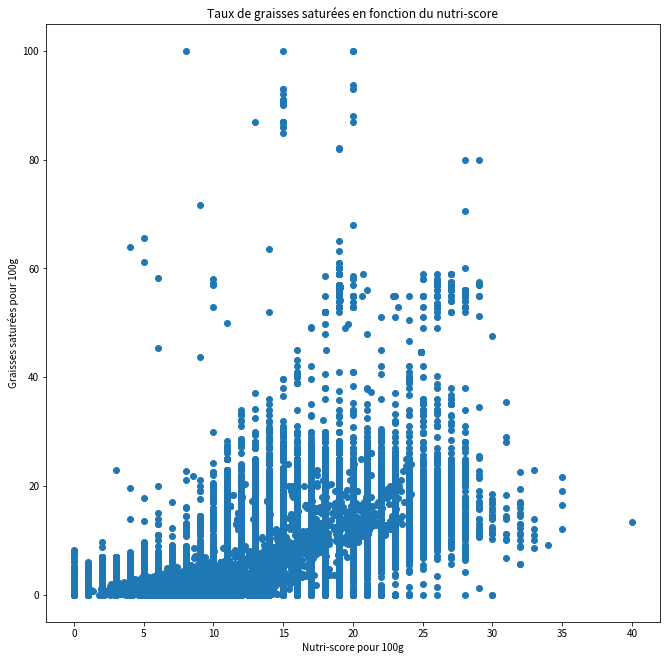

In [23]:
plt.figure(figsize=(11,11))
plt.scatter(appData["nutrition-score-fr_100g"], appData["saturated-fat_100g"])
plt.xlabel("Nutri-score pour 100g")
plt.ylabel("Graisses saturées pour 100g")
plt.title("Taux de graisses saturées en fonction du nutri-score")

Text(0.5, 1.0, 'Taux de sucres en fonction du nutri-score')

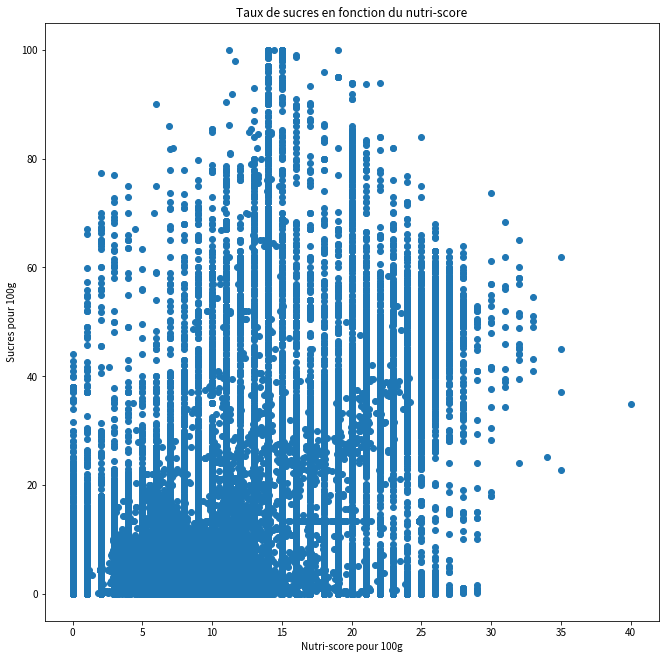

In [24]:
plt.figure(figsize=(11,11))
plt.scatter(appData["nutrition-score-fr_100g"], appData["sugars_100g"])
plt.xlabel("Nutri-score pour 100g")
plt.ylabel("Sucres pour 100g")
plt.title("Taux de sucres en fonction du nutri-score")

Text(0.5, 1.0, 'Taux de fibres en fonction du nutri-score')

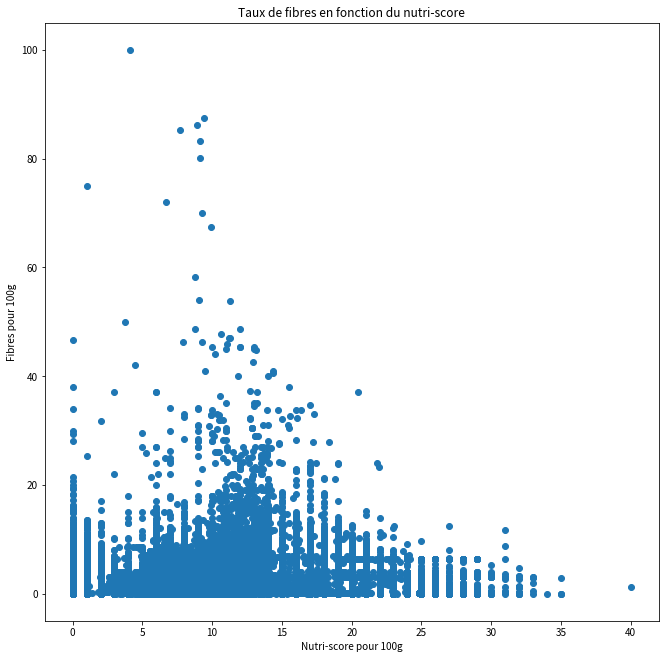

In [25]:
plt.figure(figsize=(11,11))
plt.scatter(appData["nutrition-score-fr_100g"], appData["fiber_100g"])
plt.xlabel("Nutri-score pour 100g")
plt.ylabel("Fibres pour 100g")
plt.title("Taux de fibres en fonction du nutri-score")

Text(0.5, 1.0, 'Taux de protéines en fonction du nutri-score')

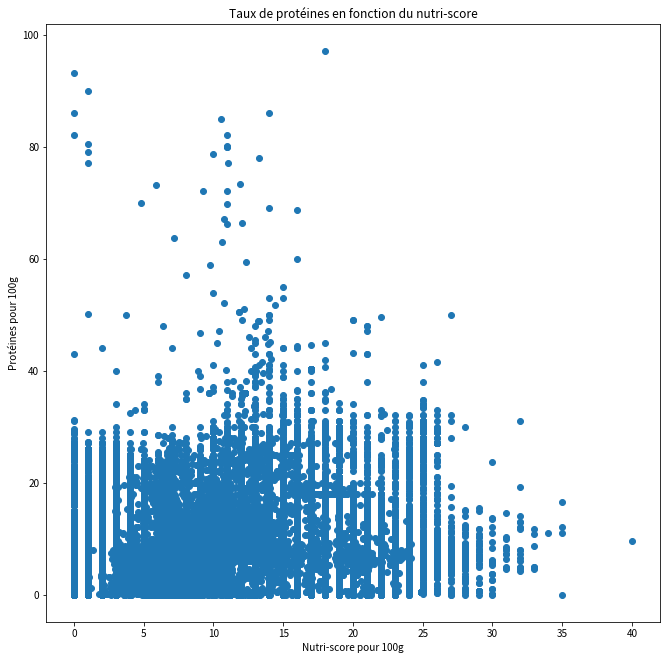

In [26]:
plt.figure(figsize=(11,11))
plt.scatter(appData["nutrition-score-fr_100g"], appData["proteins_100g"])
plt.xlabel("Nutri-score pour 100g")
plt.ylabel("Protéines pour 100g")
plt.title("Taux de protéines en fonction du nutri-score")

Text(0.5, 1.0, 'Energie en fonction du nutri-score')

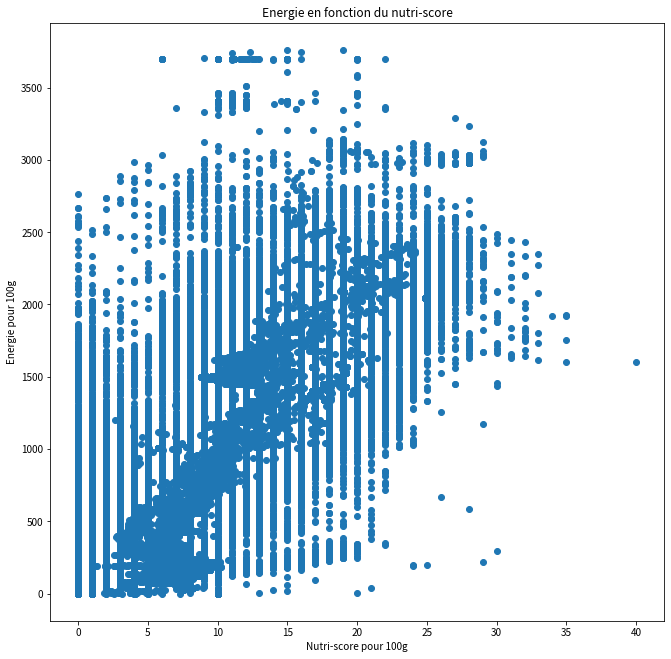

In [27]:
plt.figure(figsize=(11,11))
plt.scatter(appData["nutrition-score-fr_100g"], appData["energy_100g"])
plt.xlabel("Nutri-score pour 100g")
plt.ylabel("Energie pour 100g")
plt.title("Energie en fonction du nutri-score")

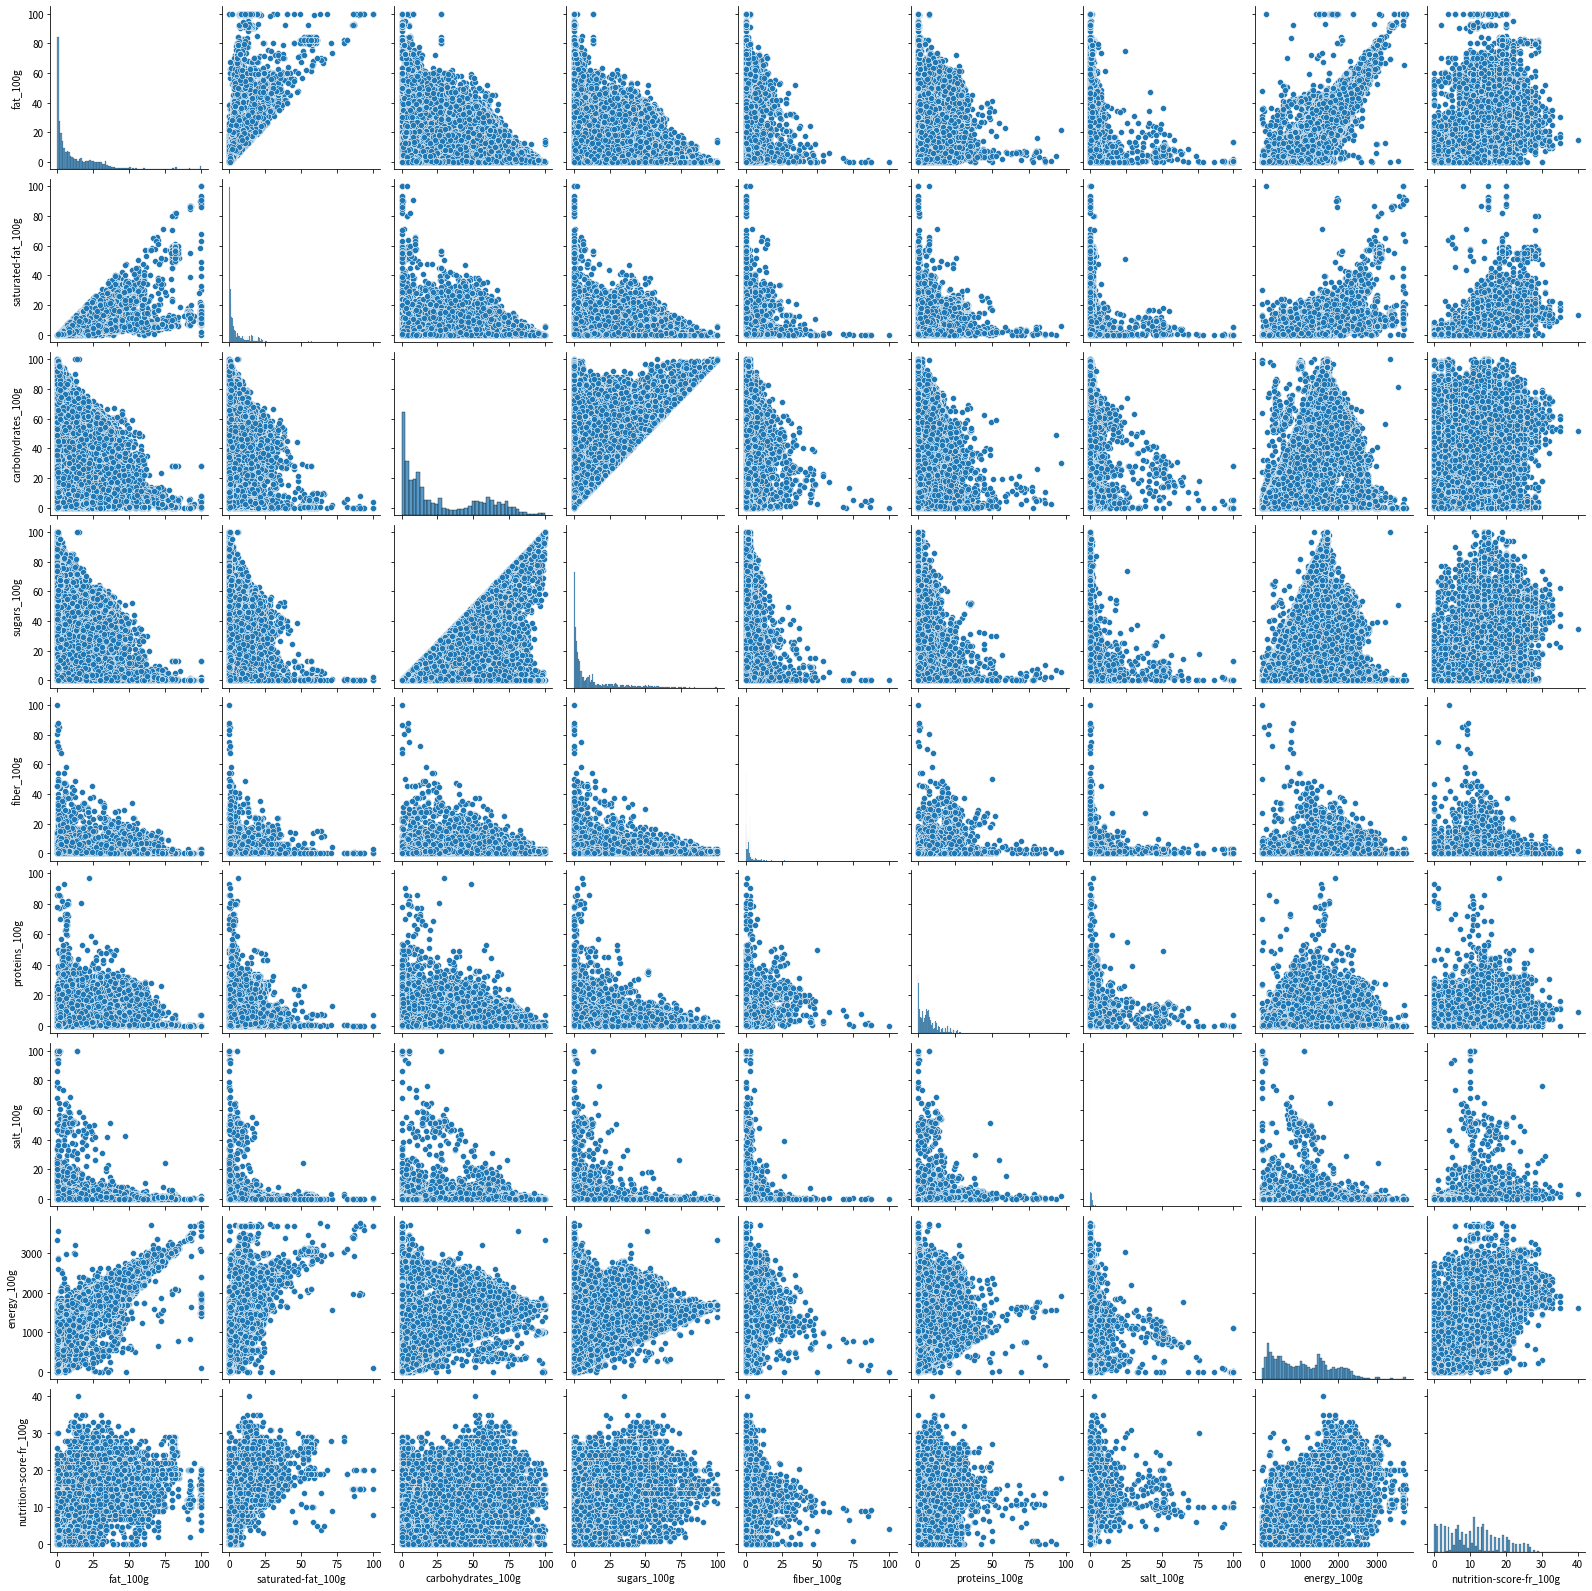

In [28]:
sns.pairplot(appData.loc[:,['fat_100g',
          'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g','energy_100g','nutrition-score-fr_100g']])

Text(0.5, 1.0, "Taux de sucres en fonction de l'energie")

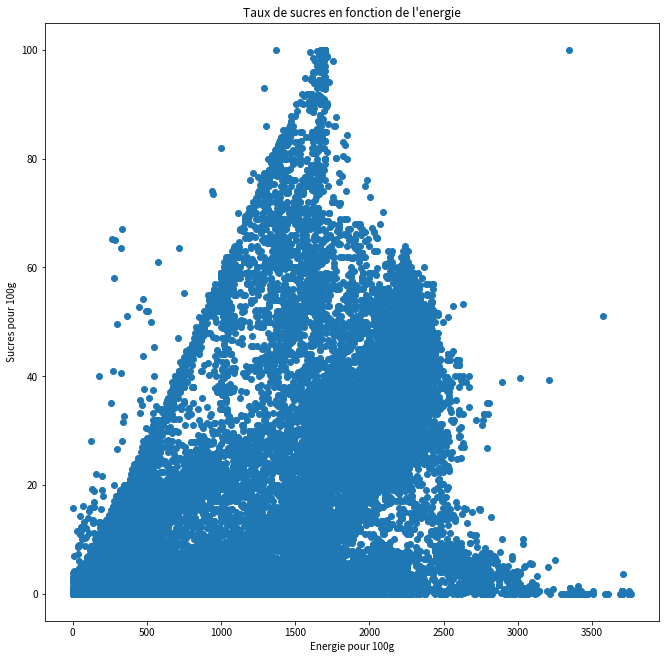

In [29]:
plt.figure(figsize=(11,11))
plt.scatter(appData["energy_100g"], appData["sugars_100g"])
plt.xlabel("Energie pour 100g")
plt.ylabel("Sucres pour 100g")
plt.title("Taux de sucres en fonction de l'energie")

Text(0.5, 1.0, "Taux de graisses en fonction de l'energie")

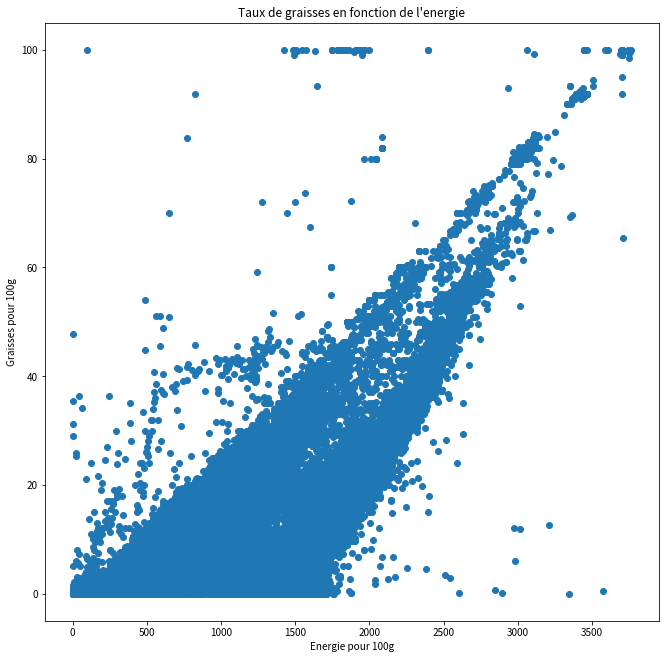

In [30]:
plt.figure(figsize=(11,11))
plt.scatter(appData["energy_100g"], appData["fat_100g"])
plt.xlabel("Energie pour 100g")
plt.ylabel("Graisses pour 100g")
plt.title("Taux de graisses en fonction de l'energie")

# <font color='red'>III - Réduction de dimension</font>

In [31]:
tempAppData = appData.loc[:,['fat_100g',
          'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g','energy_100g','nutrition-score-fr_100g']]
normAppData = (tempAppData - tempAppData.mean())/(tempAppData.std())
del tempAppData

Il y a 0 valeurs manquantes sur 448245 valeurs totales.
Le taux de remplissage est de : 100.0 %
Dimension du dataframe : (49805, 9)


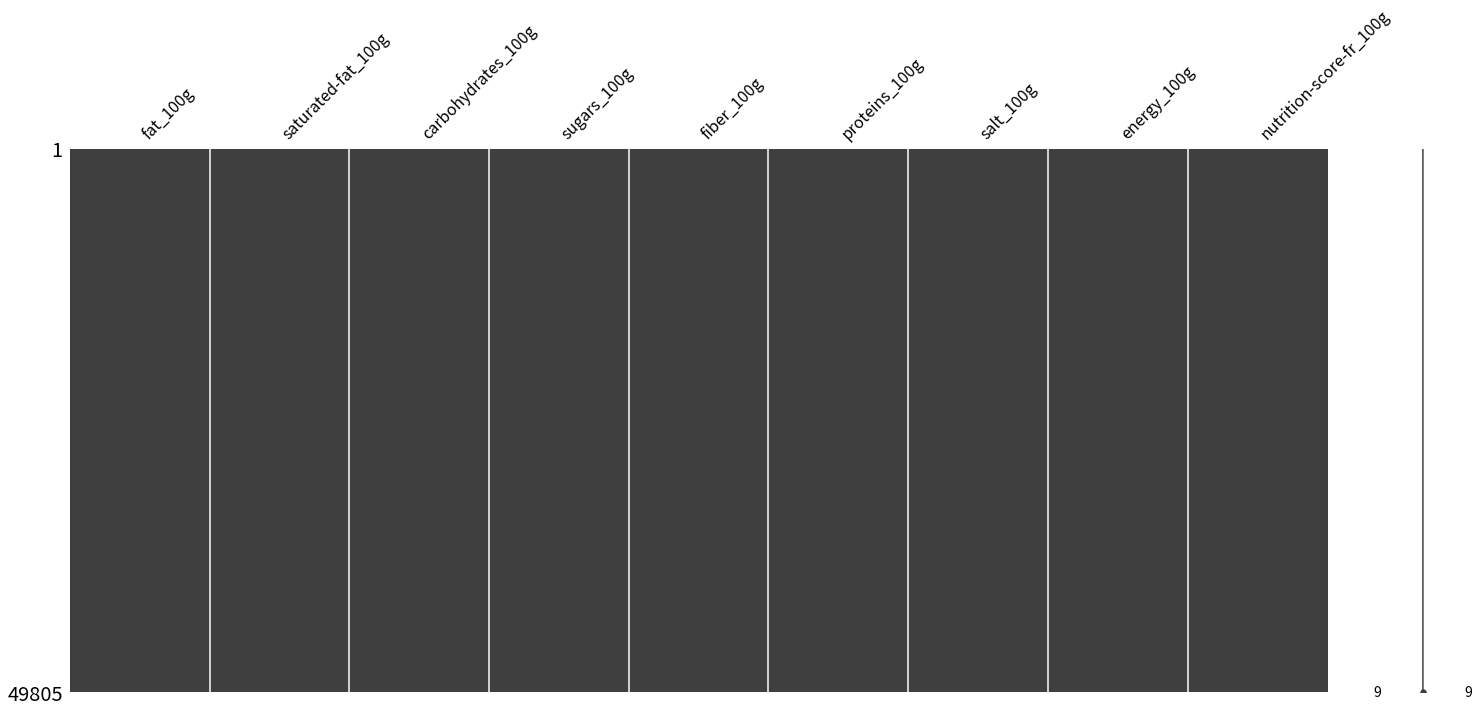

In [32]:
missingValuesInfos(normAppData)

In [33]:
model = PCA(n_components = 9)
reducedData = model.fit_transform(normAppData)

Text(0.5, 0, "Nb de composantes dans l'ACP")

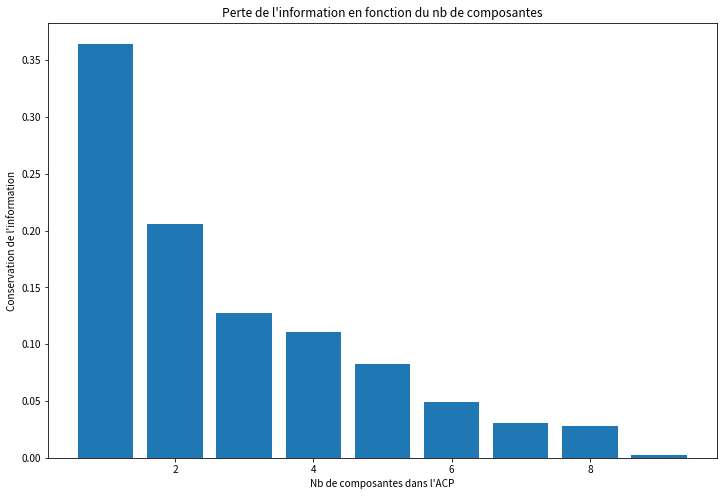

In [59]:
plt.figure(figsize = (12,8))
plt.bar([1,2,3,4,5,6,7,8,9],model.explained_variance_ratio_)
plt.title("Perte de l'information en fonction du nb de composantes")
plt.ylabel("Conservation de l'information")
plt.xlabel("Nb de composantes dans l'ACP")

## <font color='green'>III/1 - Réduction de dimension pour visualisation 3D</font>

In [35]:
model3D = PCA(n_components = 3)
appData3D = model3D.fit_transform(normAppData)

In [36]:
print("appData3D : ",appData3D.shape)

appData3D :  (49805, 3)


/tmp/ipykernel_146/1350321891.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


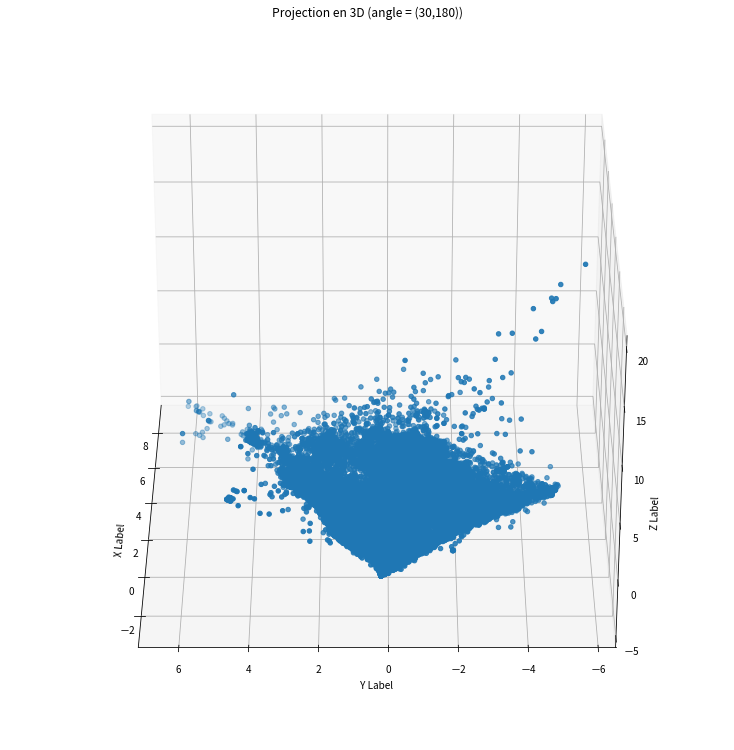

In [37]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

x = appData3D.T[0]
y = appData3D.T[1]
z = appData3D.T[2]

ax.scatter(x,y,z, marker = 'o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Projection en 3D (angle = (30,180))')
ax.view_init(30, 180)
plt.show()

## <font color='green'>III/1 - Réduction de dimension pour compression</font>

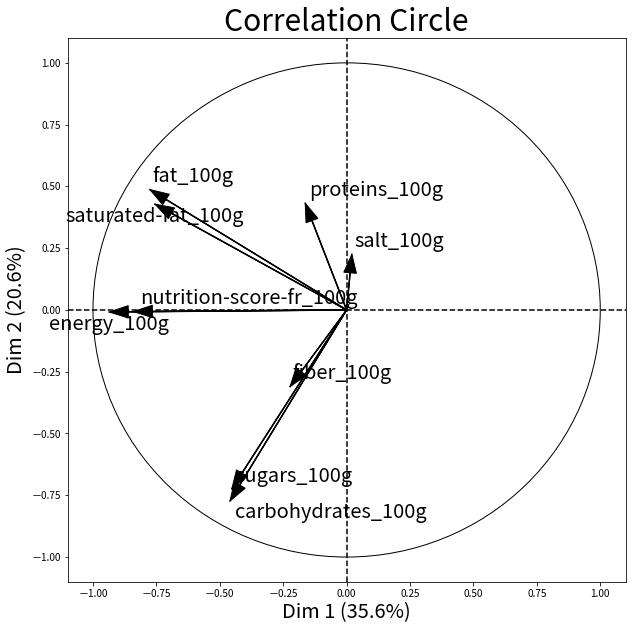

In [38]:
PCAindex = np.random.choice(normAppData.index, size = 12000, replace = False)
PCAcolumns = ['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g','energy_100g','nutrition-score-fr_100g']
figure, correlation_matrix = plot_pca_correlation_graph(normAppData.loc[PCAindex,PCAcolumns],variables_names=PCAcolumns, dimensions =(1,2,4), figure_axis_size=10)

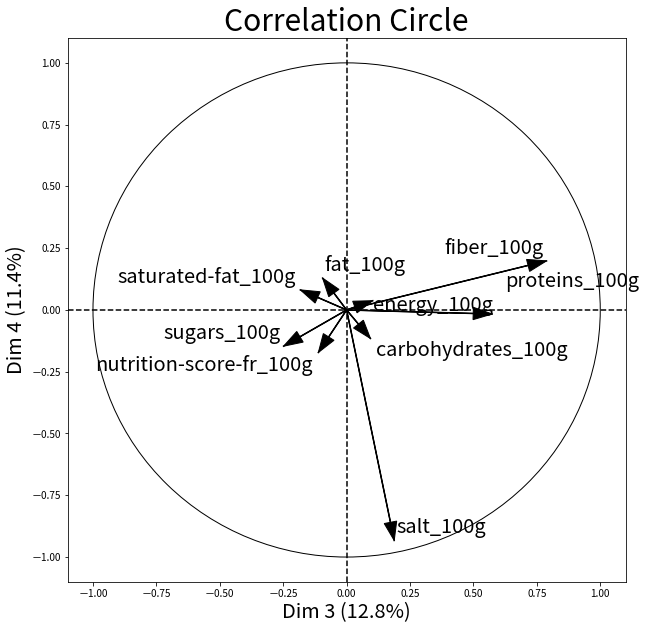

In [39]:
figure, correlation_matrix = plot_pca_correlation_graph(normAppData.loc[PCAindex,PCAcolumns],variables_names=PCAcolumns, dimensions =(3,4,4), figure_axis_size=10)

In [40]:
print("normAppData.shape :", normAppData.shape)
print("correlation_matrix.shape :", correlation_matrix.shape)
correlation_matrix

normAppData.shape : (49805, 9)
correlation_matrix.shape : (9, 4)


,Dim 1,Dim 2,Dim 3,Dim 4
fat_100g,-0.775622,0.487054,-0.094648,0.128933
saturated-fat_100g,-0.755694,0.428371,-0.182600,0.081270
carbohydrates_100g,-0.459725,-0.773066,0.093958,-0.115481
sugars_100g,-0.452564,-0.724073,-0.248549,-0.146646
fiber_100g,-0.223052,-0.310567,0.788186,0.198574
proteins_100g,-0.163194,0.431860,0.574092,-0.016405
salt_100g,0.020614,0.225146,0.187649,-0.932974
energy_100g,-0.935807,-0.008314,0.102961,0.037476
nutrition-score-fr_100g,-0.840827,-0.006519,-0.111500,-0.172225


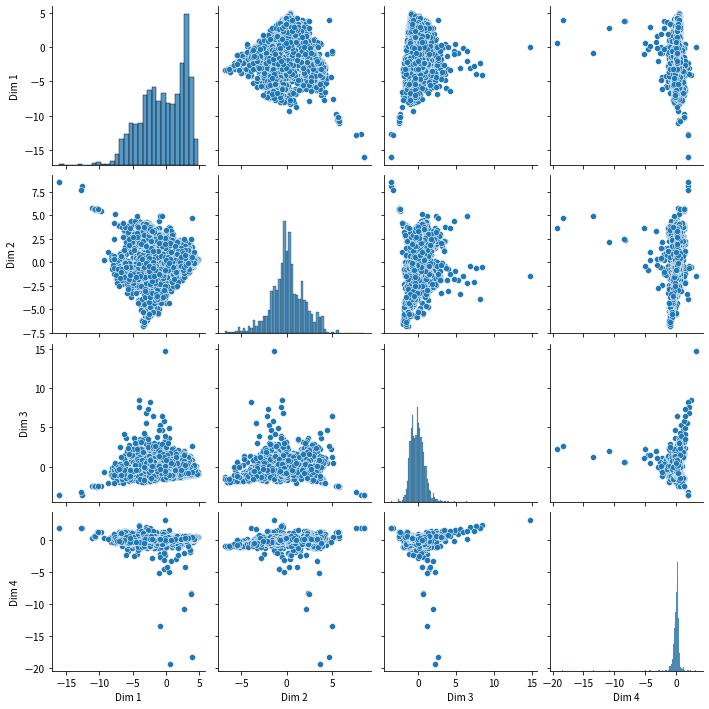

In [41]:
projectData = normAppData.iloc[1:3500,0:9].dot(correlation_matrix)
sns.pairplot(projectData)

<AxesSubplot:>

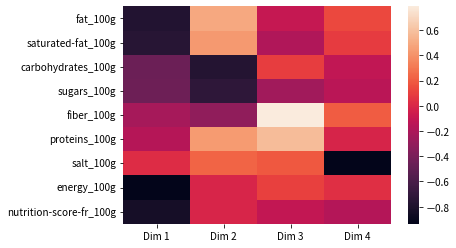

In [42]:
sns.heatmap(correlation_matrix)

# <font color='red'>IV - Analyse de variance</font>

## <font color='green'>IV/1 - ANOVA - pnns_groups_2</font>

In [43]:
normAppData = normAppData.loc[:,['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g']].astype(float)
normAppData.insert(loc = len(normAppData.columns), column="pnns_groups_2", value = appData["pnns_groups_2"])
normAppData.insert(loc = 0, column="code", value = appData["code"])
normAppData.columns

Index(['code', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g', 'pnns_groups_2'],
      dtype='object')

Il y a 0 valeurs manquantes sur 498050 valeurs totales.
Le taux de remplissage est de : 100.0 %
Dimension du dataframe : (49805, 10)


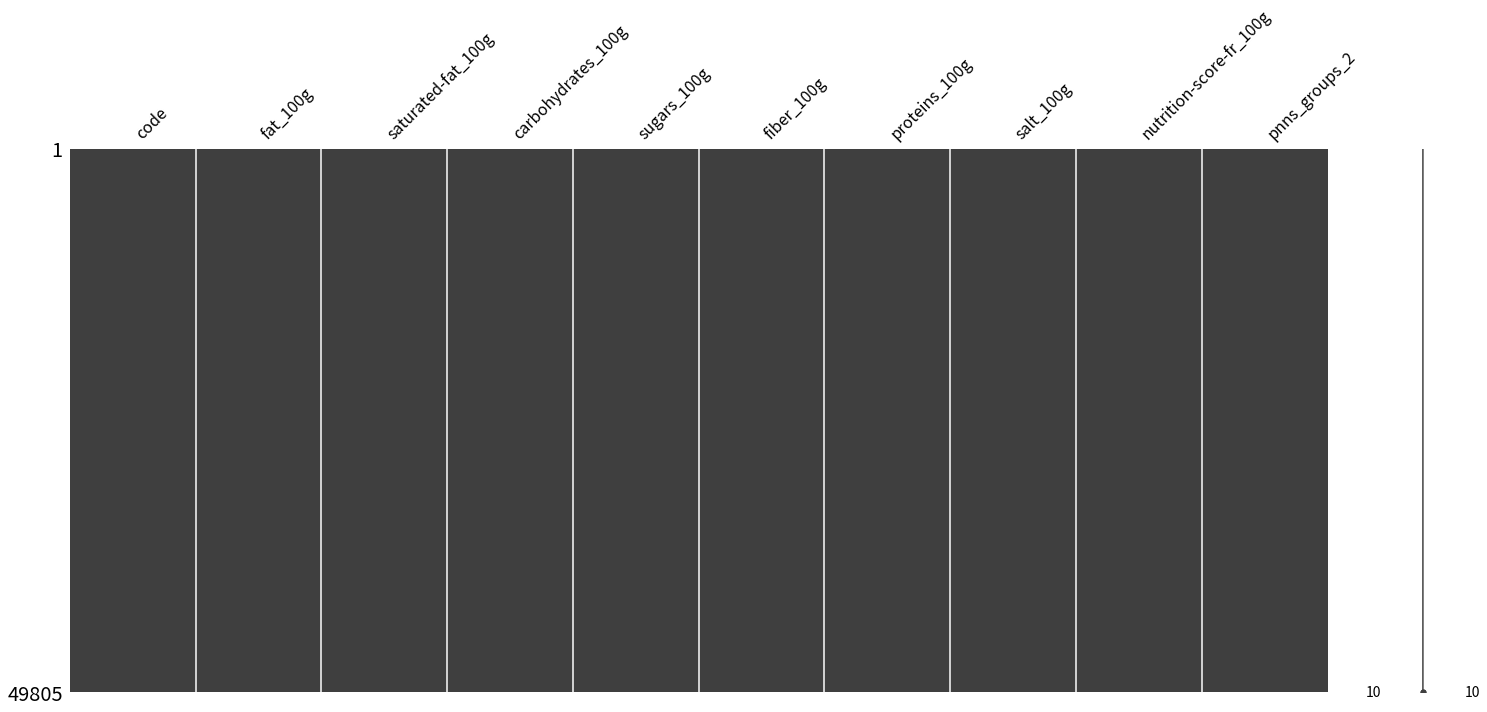

In [44]:
missingValuesInfos(normAppData)

In [45]:
df = pd.DataFrame(data = np.nan, index = [i for i in range(49805)], columns = normAppData["pnns_groups_2"].unique())

In [46]:
for e in df.columns :
    newCol = normAppData.loc[normAppData["pnns_groups_2"] == e,"nutrition-score-fr_100g"]
    newCol.reset_index(drop = True, inplace =True)
    df.loc[:,e] = newCol.copy()

Il y a 235317 valeurs manquantes sur 285122 valeurs totales.
Le taux de remplissage est de : 17.46 %
Dimension du dataframe : (7706, 37)


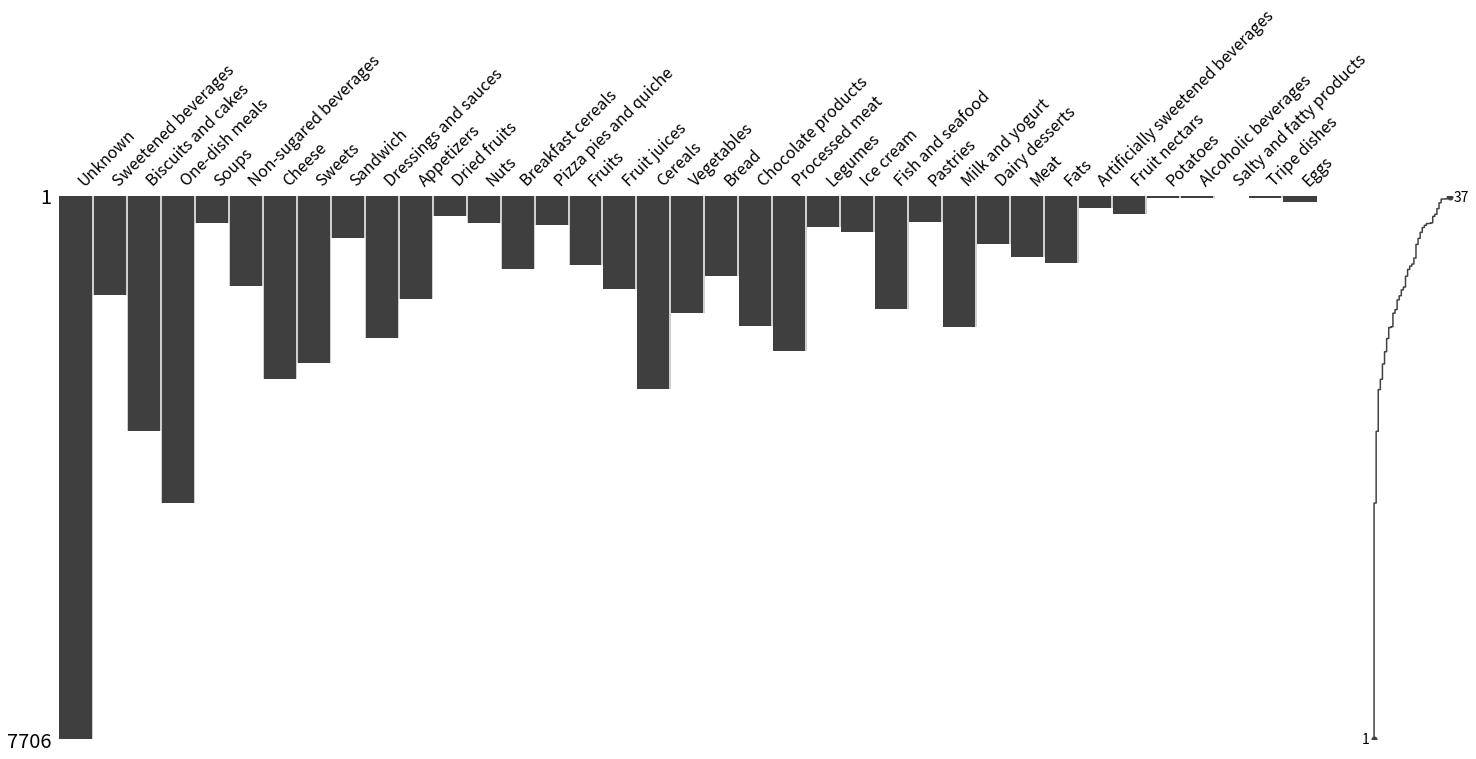

In [47]:
df.dropna(how = 'all', inplace = True)
missingValuesInfos(df)

In [48]:
# On garde uniquement les pnns_groups_2 qui ont plus de 1000 individus renseingnés
df = df.loc[0:1000,:]
df.dropna(axis = 1, inplace = True)

In [49]:
fvalue, pvalue = stats.f_oneway(df["Sweetened beverages"],df["Biscuits and cakes"],df["One-dish meals"],df["Non-sugared beverages"],df["Cheese"],df["Sweets"],df["Dressings and sauces"],df["Appetizers"],df["Breakfast cereals"],df["Fruit juices"],df["Cereals"],df["Vegetables"],df["Bread"],df["Chocolate products"],df["Processed meat"],df["Fish and seafood"],df["Milk and yogurt"])
print(fvalue,pvalue)

864.2632475017014 0.0


Text(0.5, 1.0, 'Répartition du nutrition-score par sous-catégorie')

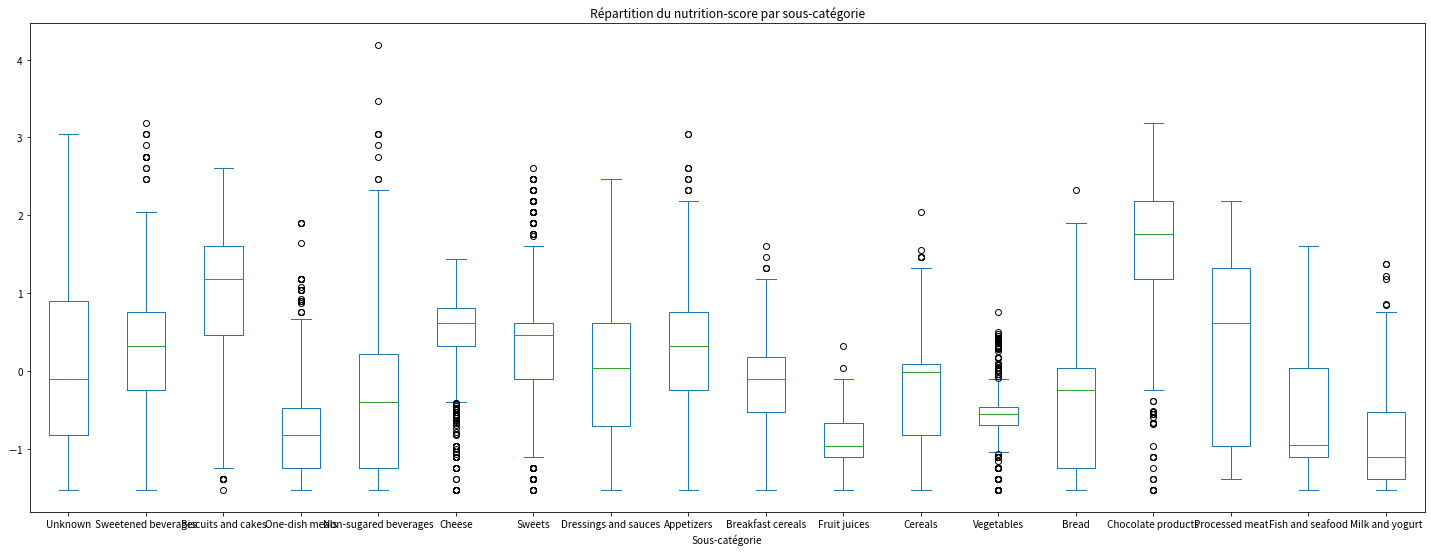

In [50]:
df.plot.box(figsize=(25,9))
plt.xlabel("Sous-catégorie")
plt.title("Répartition du nutrition-score par sous-catégorie")

<AxesSubplot:>

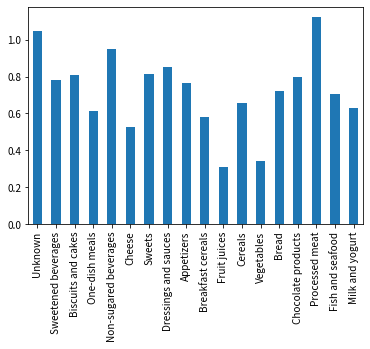

In [51]:
df.std().plot.bar()

## <font color='green'>IV/2 - ANOVA - labels</font>

Il y a 23798 valeurs manquantes sur 547855 valeurs totales.
Le taux de remplissage est de : 95.65 %
Dimension du dataframe : (49805, 11)


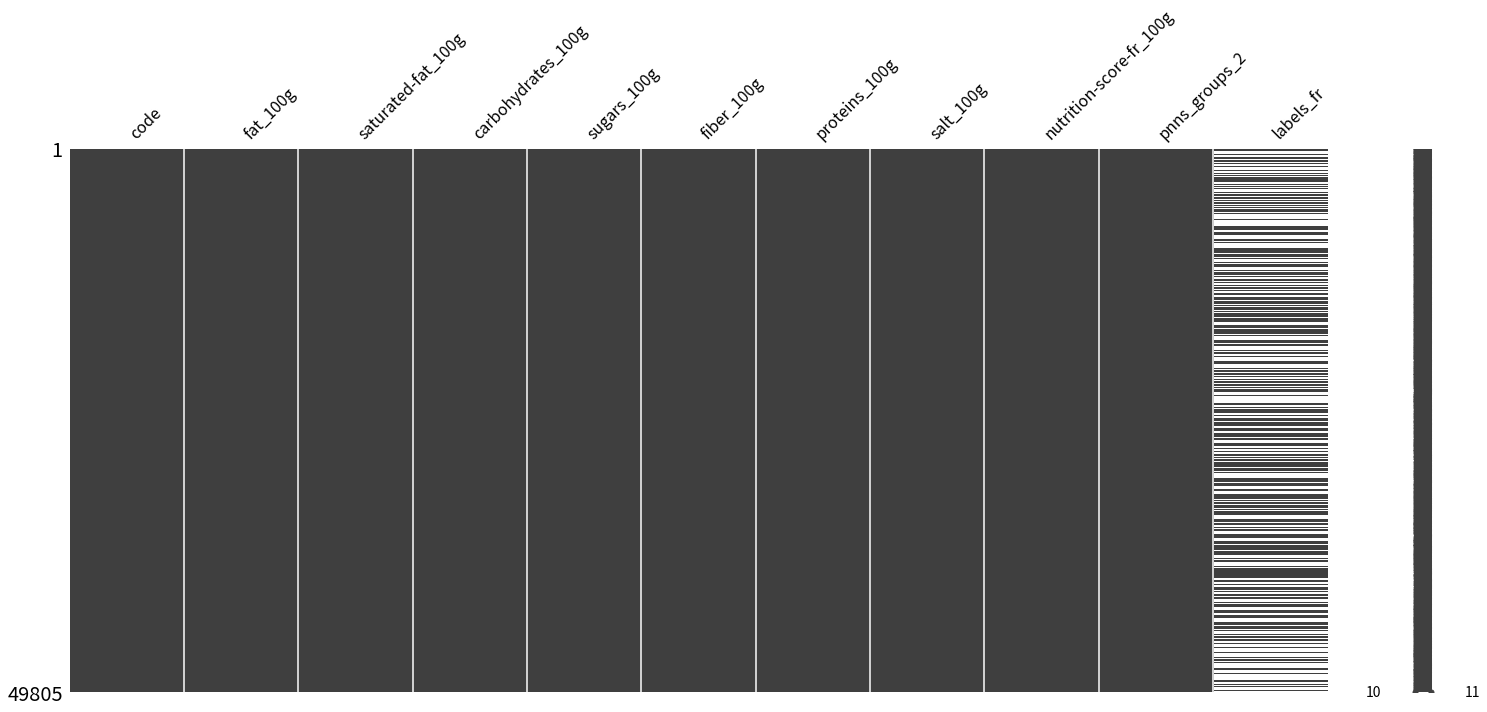

In [52]:
normAppData.insert(loc = len(normAppData.columns), column = "labels_fr", value = appData["labels_fr"])
missingValuesInfos(normAppData)

In [53]:
labelData = normAppData.loc[:,["nutrition-score-fr_100g","labels_fr"]].copy().dropna()

In [54]:
df = pd.DataFrame(data = np.nan, index = [i for i in range(49805)], columns = ["Point Vert","Fabriqué en France","Sans gluten","Bio"])

In [55]:
df.dropna(how = 'all', axis = 0, inplace = True)
df.shape

(0, 4)

In [56]:
#df.pop("Végétarien")
df.dropna(how = 'any', axis = 0, inplace = True)
df.shape

(0, 4)

ValueError: zero-size array to reduction operation minimum which has no identity

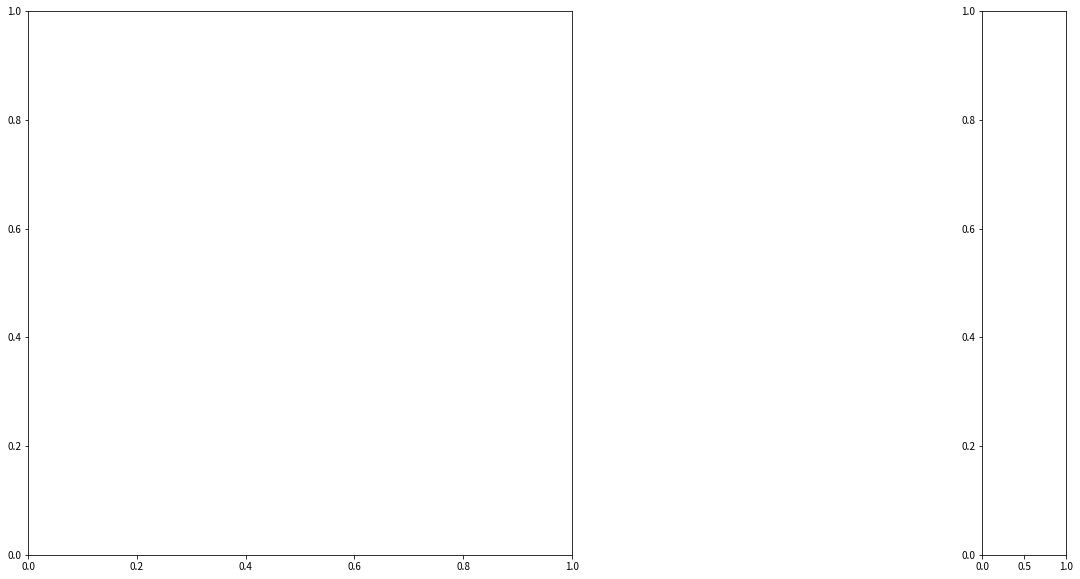

In [57]:
msno.matrix(df)

In [ ]:
stats.f_oneway(df["Point Vert"],df["Fabriqué en France"],df["Sans gluten"],df["Bio"])

In [ ]:
df.plot.box(figsize = (10,6))
plt.xlabel("Labels")
plt.title("Répartition du nutrition-score par labels")

## <font color='green'>IV/3 - Test de Tuckey</font>

In [ ]:
testDf = pd.melt(df)
missingValuesInfos(testDf)

In [ ]:
testTukey = pairwise_tukeyhsd(endog = testDf["value"], groups=testDf["variable"])

In [ ]:
testTukey.summary()

## <font color='green'>IV/4 - Test de Bartlett</font>

In [ ]:
f,p = stats.bartlett(df["Point Vert"],df["Fabriqué en France"],df["Sans gluten"],df["Bio"])
print("f:",f)
print("p:",p)

In [ ]:
resDf = df - df.mean()
resList = df.stack().values

In [ ]:
resDf.shape

In [ ]:
len(resList)

In [ ]:
plt.hist(resList, bins = 'auto')
plt.title("Répartition des résidus autour de la moyenne")
plt.xlabel("Ecart à la moyenne")
plt.ylabel("Nombre de produits")

In [ ]:
sm.qqplot(resList, line = '45')
plt.title("QQplot des résidus")